In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve, inv
from scipy.linalg import solve_banded

In [ ]:
def f(x):
    return 1 + (1/2)*np.tanh(2*x)
    

N = 100
x = np.linspace(-2, 2, N)
h = 1e-5

df_dx = (f(x + (h/2)) - f(x - h/2)) / h 

In [ ]:
analytical = 1 / np.cosh(2*x)**2

In [ ]:
plt.plot(x, df_dx, marker='.', label='numerical')
plt.plot(x, analytical, label='analytical')
plt.legend()

In [ ]:
print(analytical - df_dx)

In [ ]:
x

In [ ]:
def f1(x):
    return 1 + 1/(2*np.tanh(2*x))

def derive(f, x, h: int = 1e-5):
    return (f(x + (h/2)) - f(x - h/2)) / h 

df_dx1 = (f1(x + (h/2)) - f1(x - h/2)) / h 
# yarr = derive(f1, x)
analytical1 = -1 / (np.sinh(2*x)**2)

In [ ]:
plt.plot(x, df_dx1, marker='.', label='numerical')
# plt.plot(x, yarr, marker='.', label='numerical')
plt.plot(x, analytical1, label='tanh downstairs')
# plt.plot(x, analytical, label='tanh upstairs') 
# plt.ylim(-10000,10000)
# plt.xscale('log')
plt.legend()

In [ ]:
df_dx1

In [ ]:
yarr

# Interpolation

In [ ]:
x = [0,1,2,3,4]
f = [1.,2.,5.,10.,17.]

def interpolate(arr, f, x):
    idx = np.searchsorted(arr, x)
    print(idx)
    
    if idx == 0:
        return arr[0]
    elif idx == len(arr):
        return arr[-1]
    
    a, b = arr[idx - 1], arr[idx]
    print(a,b)
    
    y = f[a] + ((x - arr[a]) / (arr[b] - arr[a])) * (f[b] - f[a])
    
    return y

interpolated_value = interpolate(x, f, 1.3)
print(f"Interpolated value: {interpolated_value}")


# Gaussian Elimination with Backsub

In [ ]:
A = np.array([[2.,1,4,1],
             [3,4,-1,-1],
             [1,-4,1,5],
             [2,-2,1,3]])
v = np.array([-4.,3,9,7])


In [ ]:
# Volts problem
vA = np.array([[4.,-1,-1,-1],
               [-1,3,0,-1],
               [-1,0,3,-1],
               [-1,-1,-1,4]])
vv = np.array([5,0,5,0])

In [ ]:
################
# for-loops
################

# Gaussian elim
def gausselim(A,v):
    N = len(v)
    for m in range(N):
        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x
        
print(gausselim(vA,vv))

### Partial Pivoting

In [ ]:
A1 = np.array([[0,1.,4,1],
               [3,4,-1,-1],
               [1,-4,1,5],
               [2,-2,1,3]])

v1 = np.array([-4.,3,9,7])

In [ ]:
def part_pivot(A,v):
    N = len(v)
    for m in range(N):
        
        # check the row and swap if mth row 
        # does not have max value at mth element
        idx = np.argmax(np.abs(A[m:,m])) + m
        if idx != m:
            A[[m, idx], :] = A[[idx, m], :]
            v[[m, idx]] = v[[idx, m]]

        # divide by diag elem
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # subtract from lower rows 
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
    # Back substitution
    x = np.zeros(N)
    for m in range(N - 1, -1, -1):
        x[m] = v[m] - np.dot(A[m, m + 1:], x[m + 1:])
        
    return x

In [ ]:
part_pivot(A,v)

In [ ]:
part_pivot(A1,v1)

In [ ]:
x = solve(A,v)
x

In [ ]:
X = inv(A)
X

### tridiagonal matrices

In [ ]:
# constants
N = 26
C = 1.
m = 1.
k = 6.
omega = 2.
alpha = 2*k-(m*omega**2)

# set up init values of arrays
A = np.zeros([N,N])
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha - k
A[N-1,N-1] = alpha - k
v = np.zeros(N)
v[0]=C

# print("A before Gaussian elim")
# print(A)

# Gussian elim
for i in range(N-1):

    # divide row i by its diagonal elem
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    # print(f"i: {i}")
    # print(f"A after division at i={i}")
    # print(A)

    # sub from next row down
    A[i+1,i+1] -= A[i+1, i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]
    # print(f"A after subtracting next row at i={i}")
    # print(A)

# divide last elem of v by last diag elem
v[N-1] /= A[N-1, N-1]
# print("A after dividing last elem of v by last diag elem")
# print(v)

# backsub
x = np.zeros(N)
x[N-1] = v[N-1]
for i in range(N-2, -1, -1):
    x[i] = v[i] - A[i, i+1]*x[i+1]
    # print(x[i])

# plot
plt.plot(x)
plt.plot(x, "ko")
plt.show()

In [ ]:
A1 = np.zeros([3,N])
A1[0,:] = -k
A1[1,:] = alpha
A1[2,:] = -k
A1[1,0] = alpha - k
A1[1,N-1] = alpha - k

x1 = solve_banded((1,1),A1,v)
plt.plot(x1)
plt.plot(x1, 'ko')
plt.show()

## Nonlinear Equations

### relaxation method

In [ ]:
from math import exp

In [ ]:
c = np.arange(0,3.1,0.1)
x = 1

def fn(c):
    return 1 - np.exp(-c*x)

def relax(func, c, guess):
    for k in range(100):
        guess = func(c)
    return guess

solns = relax(fn, c, x) 

In [ ]:
for k in range(100):
    x = fn(c)

In [ ]:
plt.plot(c, solns, label=f'f(x)={solns[-1]:.3f}')
plt.xlabel('C')
plt.ylabel('x')
plt.legend()
plt.show()

In [ ]:
np.shape(solns)

## Newton-Raphson

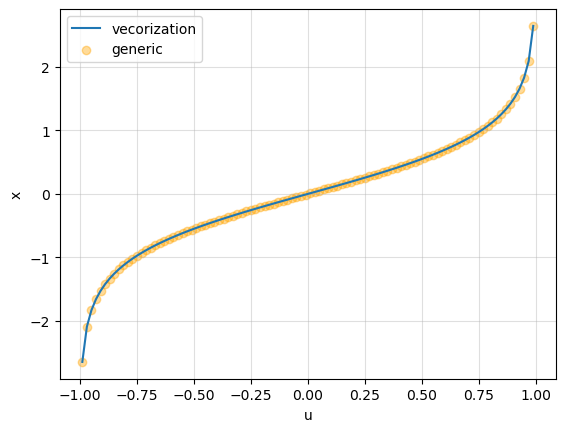

In [42]:
# example 6.4: inverse hyperbolic tangent

eps = 1e-12

def arctanh(u):
    x = 0.
    delta = 1.
    while np.abs(delta) > eps:
        delta = (np.tanh(x) - u)*np.cosh(x)**2
        x -= delta
    return x

# python/vectorization solution
arctanh_vec = np.vectorize(arctanh)
u_vals_vec = np.linspace(-0.99, 0.99, 100)
x_points_vec = arctanh_vec(u_vals)

# generic solution
u_vals_gen = np.linspace(-0.99, 0.99, 100)
x_points_gen = []
for u in u_vals:
    x_points_gen.append(arctanh(u))

plt.plot(u_vals_vec, x_points_vec, label='vecorization')
plt.scatter(u_vals_gen, x_points_gen, color='orange', alpha=0.4, label='generic')
plt.xlabel('u')
plt.ylabel('x')
plt.grid(alpha=0.4)
plt.legend()
plt.show()



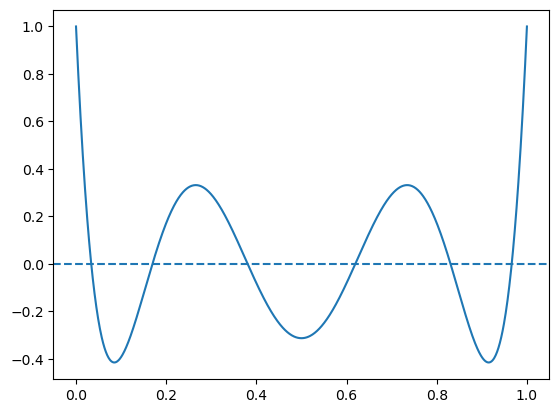

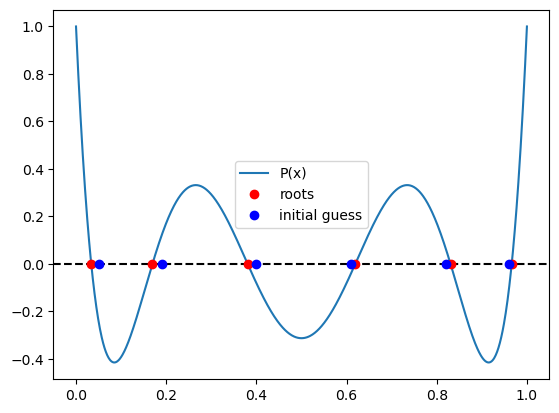

Root 1: 0.0337652429
Root 2: 0.1693953068
Root 3: 0.3806904070
Root 4: 0.6193095930
Root 5: 0.8306046932
Root 6: 0.9662347571


In [117]:
# Exercise 6.15: The roots of a polynomial

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals)
plt.axhline(0, linestyle='--')
plt.show()

def Pp(x):
    return (6*924)*x**5 - (5*2772)*x**4 + (4*3150)*x**3 - (3*1680)*x**2 +(2*420)*x - 42

# Newton-Raphson method to find roots
def find_roots(guess_arr, eps=1e-10):
    roots = []
    for guess in guess_arr:
        delta = 1.
        iters = 0
        while np.abs(delta) > eps and iters < 1000:
            delta = P(guess) / Pp(guess)
            guess -= delta
            iters += 1
        if iters >= 1000:
            print("Reached max iterations for guess:", guess)
        roots.append(guess)
    return roots

root_guesses = np.array([0.05, 0.19, 0.4, 0.61, 0.82, 0.96])

# Find the roots using the Newton-Raphson method
roots = find_roots(root_guesses)

# Plot the polynomial and the found roots
x_vals = np.linspace(0, 1, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals, label="P(x)")
plt.axhline(0, color='black', linestyle='--')

# Mark the roots on the plot
for i, root in enumerate(roots):
    if i == 0:
        plt.plot(root, 0, 'ro', alpha=1, label='roots')  # plot root at y=0
    else:
        plt.plot(root, 0, 'ro', alpha=1)  # plot root at y=0

for i, guess in enumerate(root_guesses):
    if i == 0:
        plt.plot(guess, 0, 'bo', label='initial guess')
    else:
        plt.plot(guess, 0, 'bo')

plt.legend(loc='center')
plt.show()

# Print the roots to 10 decimal places
for i, root in enumerate(roots):
    print(f"Root {i+1}: {root:.10f}")

### Secant method

In [132]:
# Exercise 6.16: The Lagrange Point

# constants
G = 6.674e-11     
M = 5.974e24         # mass Earth
m = 7.348e22         # mass moon
R = 3.844e8          # dist from Earth to L1
omega = 2.662e-6     # angular velo

# strting guess is 2/3 R
r1_guess = (2/3)*R
r2_guess = r1_guess + 1e5

######################
# SECANT METHOD
######################

def forces(r):
    return ( (G*M) / r**2 ) - ( (G*m) / (R - r)**2 ) - (omega**2*r)

def find_L1(x1, x2, eps: float=1e-4):
    delta = 1e4
    iters = 1
    while np.abs(delta) > eps and iters < 1000:
        delta = forces(x2)*( (x2 - x1) / forces(x2) - forces(x1) )
        x1, x2 = x2, x2-delta
        iters += 1
        if iters > 1000:
            print('Reached max iters')
        return x2

L1 = find_L1(r1_guess, r2_guess)
print(f'L1 is a distance {L1:.4e} meters from Earth.')

L1 is a distance 2.5627e+08 meters from Earth.
